 ## Normal conv pool with data augmentation by adjusting the zoom range of factor 0.3.
 
 
 In this notebook, I built upon the convpool architecture with one that has data augmentation built into the training set.
 
 * I decided to just change the ```zoom_range``` by 0.3 to analyse the finer features of the spectrograms better and to further generalize the training set to prevent overfitting.
 
 * Doing a rotation, shear, or flip would change the time-dependency on the X-axis of the spectrogram image, and lead to undesirable outcomes. Therefore I left those parameters as is.

In [8]:
import matplotlib.pyplot as plt

In [3]:
from convpool import Convtrain as conv
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.,
      width_shift_range=0.,
      height_shift_range=0.,
      shear_range=0.,
      zoom_range=0.3,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/', target_size = (128,1024), batch_size = 20, 
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('validation/', target_size = (128,1024), batch_size =20,
                                                       class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('test/', target_size = (128,1024), batch_size = 20,
                                                 class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Model = conv(input_shape=(128,1024,3))
Model.compile()
print(Model.model.summary())
history = Model.fit_generator(train_generator, validation_generator, epochs=20)

Found 6394 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
data batch shape: (20, 128, 1024, 3)
labels batch shape: (20, 8)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 63, 511, 32)       1568      
_________________________________________________________________
batch_normalization_6 (Batch (None, 63, 511, 32)       128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 255, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 127, 32)       9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 15, 127, 32)       128       
_________________________________________________________________
max_pooling2d_6 (Ma

Pretty bad accuracy

In [6]:
a = history.history

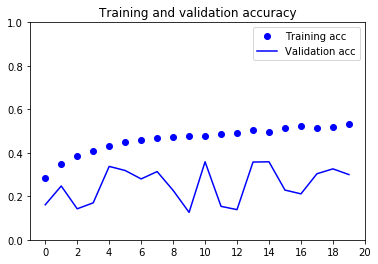

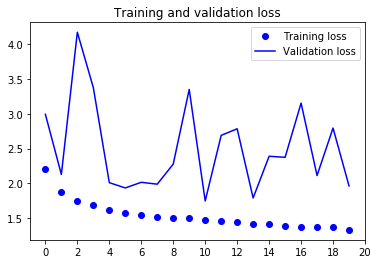

In [12]:
acc = a['acc']
val_acc = a['val_acc']
loss = a['loss']
val_loss = a['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
ax = plt.gca()
ax.set_ylim(0,1)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
ax = plt.gca()
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.show()


Data Augmentation definitely helps in preventing the training set from overfitting so quickly. However, the accuracy gains are not good and the validation set doesn't seem to be getting better over the epochs. There is a huge variation in validation loss and accuracy as well. Perhaps a better architecture that would detect more granular features is needed.